In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_excel('doi_10_5061_dryad_ft8750v__v20180821/RC+Health+Care+Data-20180820.xlsx')

In [4]:
df.shape

(211833, 25)

In [5]:

pd.set_option('display.max_rows', None)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211833 entries, 0 to 211832
Data columns (total 25 columns):
 #   Column                                                              Non-Null Count   Dtype  
---  ------                                                              --------------   -----  
 0   id                                                                  211833 non-null  int64  
 1   Age (y)                                                             211833 non-null  int64  
 2   Gender(1, male; 2, female)                                          211833 non-null  int64  
 3   site                                                                211833 non-null  int64  
 4   height(cm)                                                          211831 non-null  float64
 5   weight(kg)                                                          211833 non-null  float64
 6   BMI(kg/m2)                                                          211833 non-null  float64
 7   SB

In [6]:
df.isnull().sum()

id                                                                         0
Age (y)                                                                    0
Gender(1, male; 2, female)                                                 0
site                                                                       0
height(cm)                                                                 2
weight(kg)                                                                 0
BMI(kg/m2)                                                                 0
SBP(mmHg)                                                                 23
DBP(mmHg)                                                                 24
FPG (mmol/L)                                                               0
Cholesterol(mmol/L)                                                     4854
Triglyceride(mmol/L)                                                    4887
HDL-c(mmol/L)                                                          94562

In [7]:
display(df.describe(include='all').transpose())

,count,mean,std,min,25%,50%,75%,max
id,211833.0,343114.275594,197768.164898,1.000000,171837.000000,343120.000000,514482.000000,685286.000000
Age (y),211833.0,42.097567,12.649956,20.000000,32.000000,39.000000,50.000000,99.000000
"Gender(1, male; 2, female)",211833.0,1.451818,0.497674,1.000000,1.000000,1.000000,2.000000,2.000000
site,211833.0,5.846596,3.068889,0.000000,3.000000,5.000000,8.000000,16.000000
height(cm),211831.0,166.432212,8.326936,106.500000,160.000000,166.400000,172.500000,198.500000
weight(kg),211833.0,64.677388,12.223239,32.000000,55.200000,63.500000,72.800000,157.000000
BMI(kg/m2),211833.0,23.235742,3.342934,15.000000,20.800000,23.000000,25.380000,52.700000
SBP(mmHg),211810.0,119.063467,16.379803,59.000000,107.000000,118.000000,129.000000,222.000000
DBP(mmHg),211809.0,74.177178,10.813487,38.000000,66.000000,73.000000,81.000000,164.000000
FPG (mmol/L),211833.0,4.915240,0.611792,0.590000,4.530000,4.900000,5.300000,6.990000


In [8]:
skew_kurt = df.select_dtypes(include=[np.number]).agg(['skew', 'kurtosis']).transpose()
print("Skewness and Kurtosis:", skew_kurt)

Skewness and Kurtosis:                                                          skew     kurtosis
id                                                  -0.000701    -1.200925
Age (y)                                              0.921103     0.253666
Gender(1, male; 2, female)                           0.193630    -1.962526
site                                                 0.707517    -0.188526
height(cm)                                           0.055236    -0.411905
weight(kg)                                           0.587487     0.368618
BMI(kg/m2)                                           0.547506     0.554012
SBP(mmHg)                                            0.657875     0.865872
DBP(mmHg)                                            0.576120     0.821224
FPG (mmol/L)                                         0.078520     0.596464
Cholesterol(mmol/L)                                  0.688767     1.755458
Triglyceride(mmol/L)                                 4.602340    48.957267
HD

In [9]:
Q1 = df.quantile(0.25, numeric_only=True)
Q3 = df.quantile(0.75, numeric_only=True)
IQR = Q3 - Q1
outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()
print("Number of outliers per column:", outliers[outliers > 0])

Number of outliers per column: Age (y)                                                                2289
site                                                                    247
height(cm)                                                              202
weight(kg)                                                             1584
BMI(kg/m2)                                                             2061
SBP(mmHg)                                                              2829
DBP(mmHg)                                                              2236
FPG (mmol/L)                                                           4489
Cholesterol(mmol/L)                                                    3306
Triglyceride(mmol/L)                                                  11563
HDL-c(mmol/L)                                                          1576
LDL(mmol/L)                                                            2001
ALT(U/L)                                                 

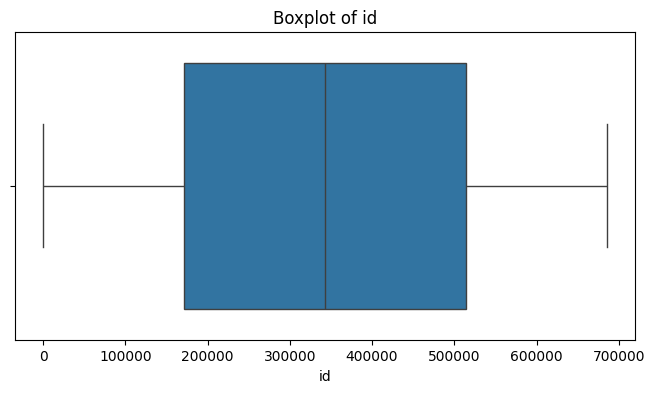

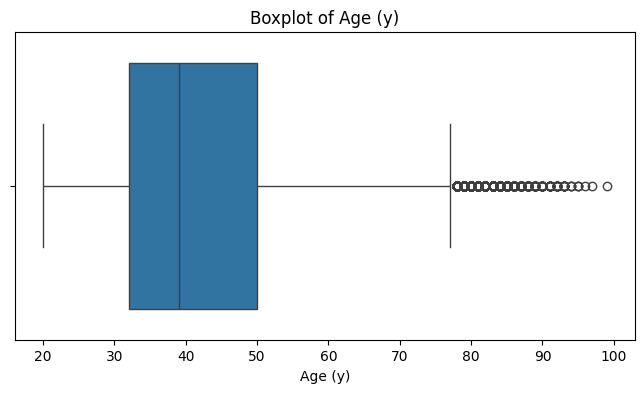

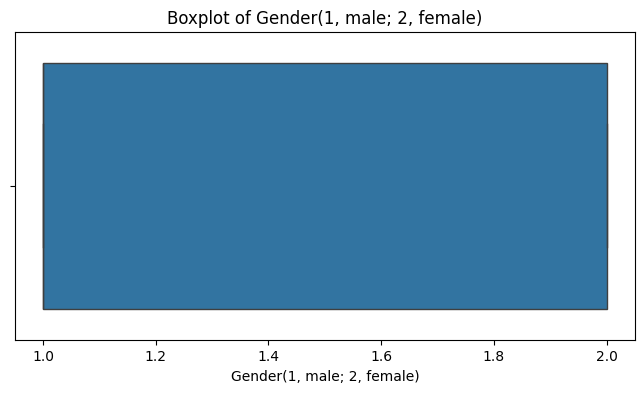

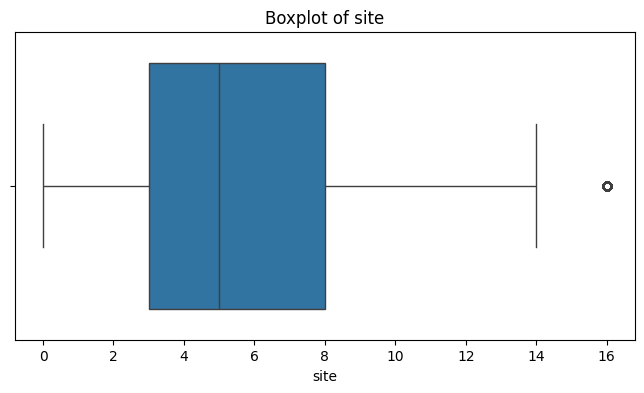

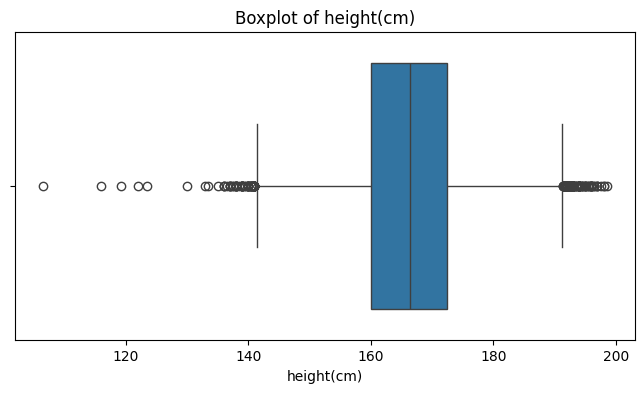

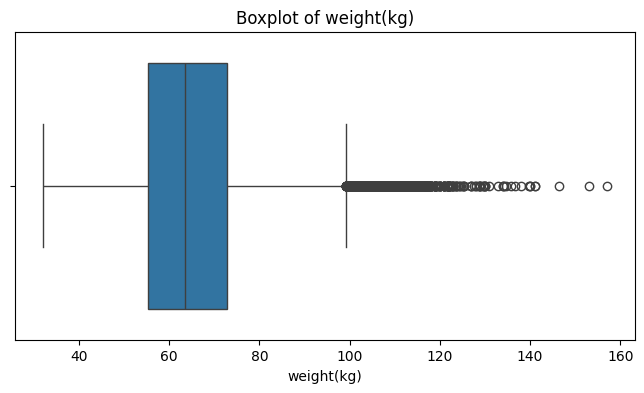

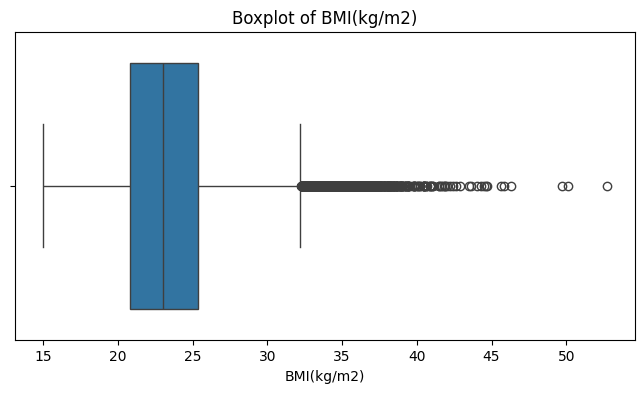

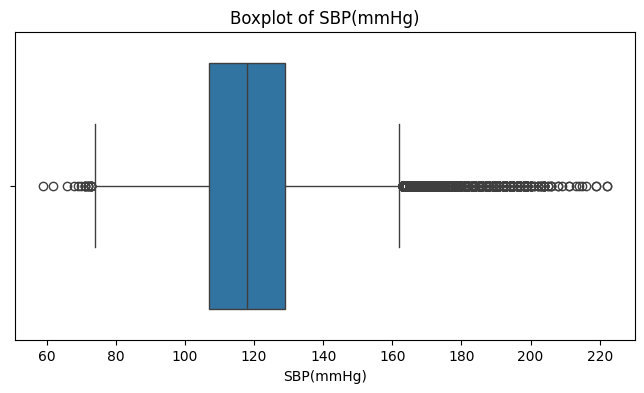

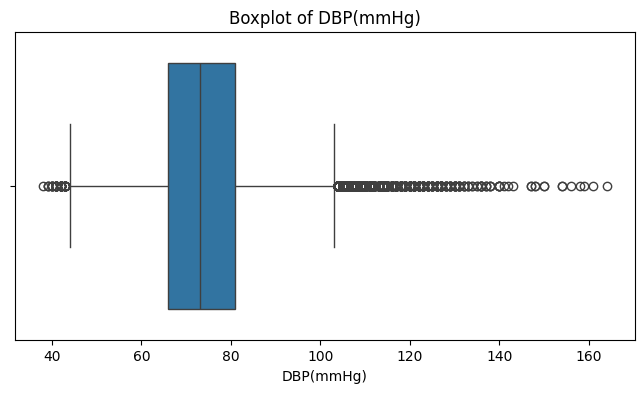

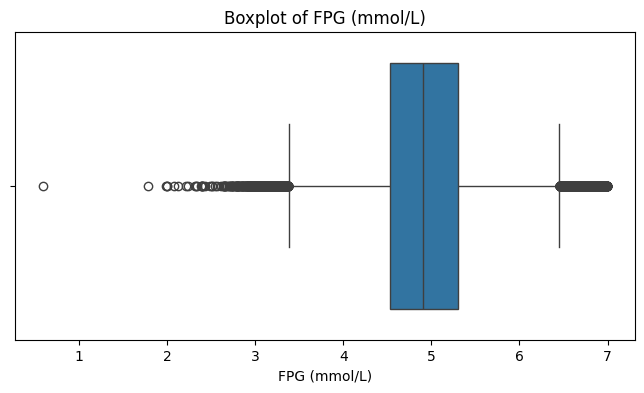

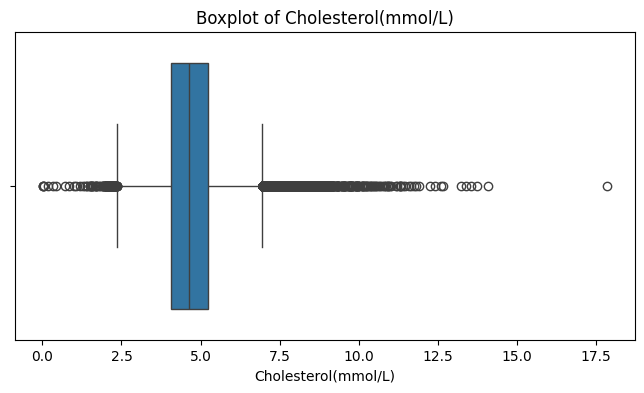

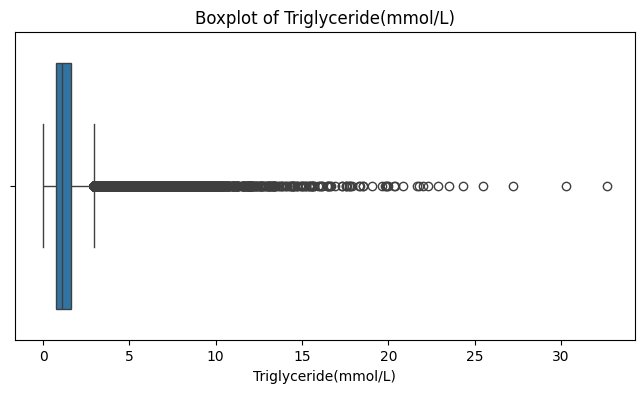

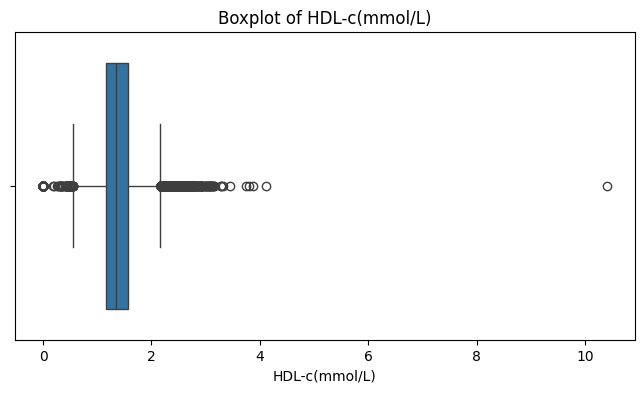

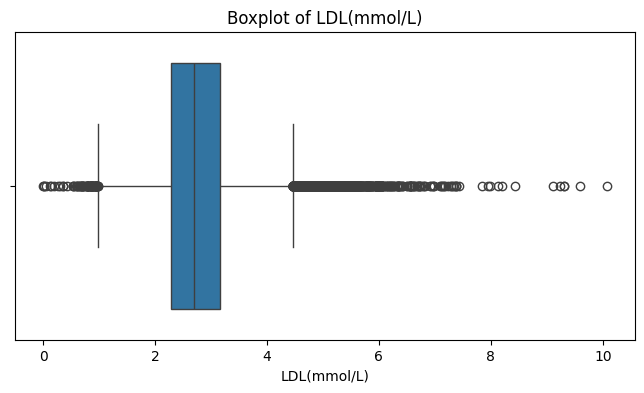

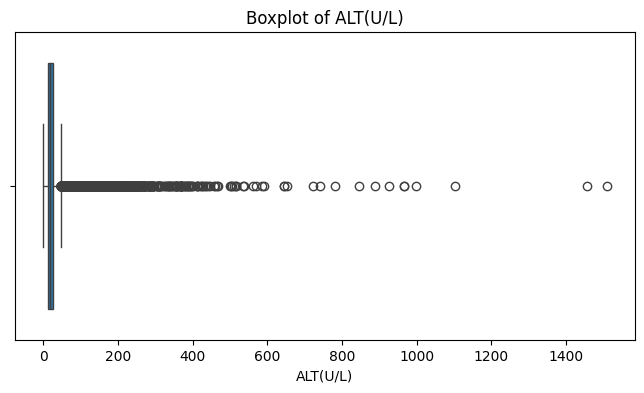

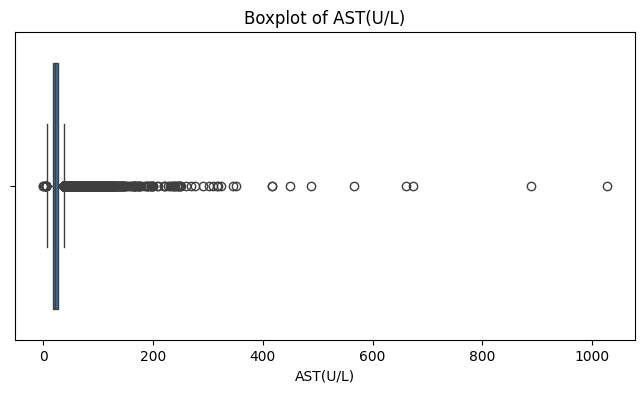

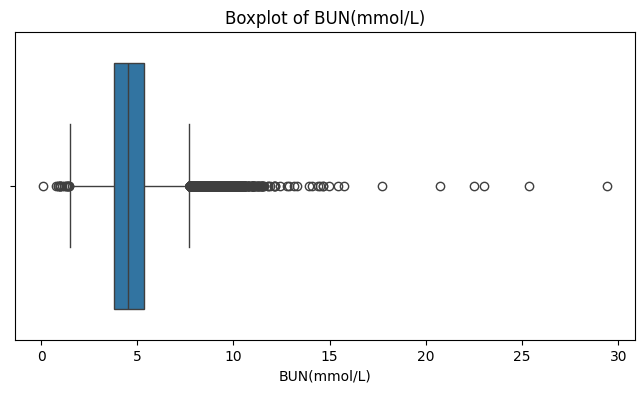

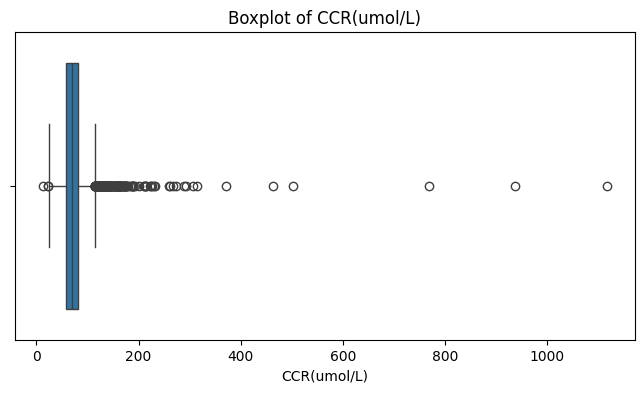

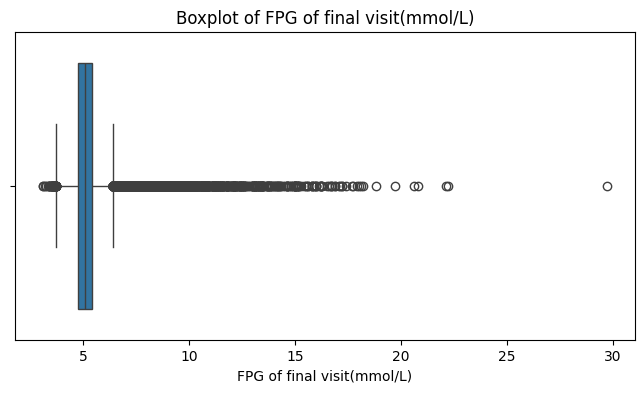

C:\Users\Nidou\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65288 (\N{FULLWIDTH LEFT PARENTHESIS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Nidou\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65289 (\N{FULLWIDTH RIGHT PARENTHESIS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


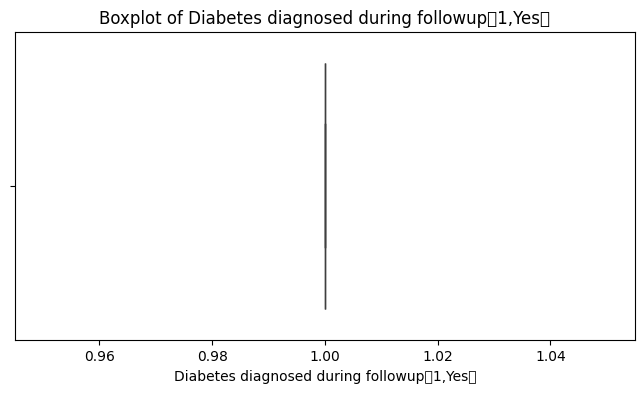

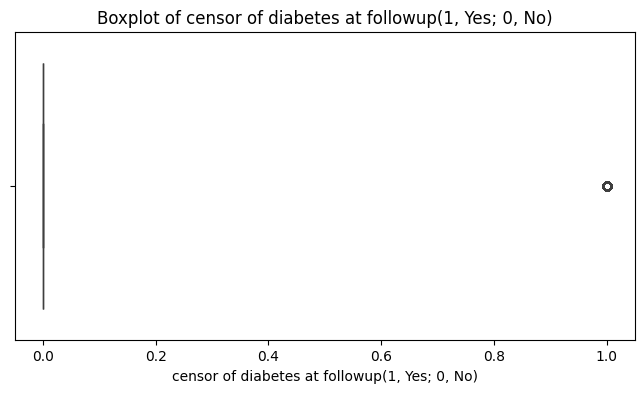

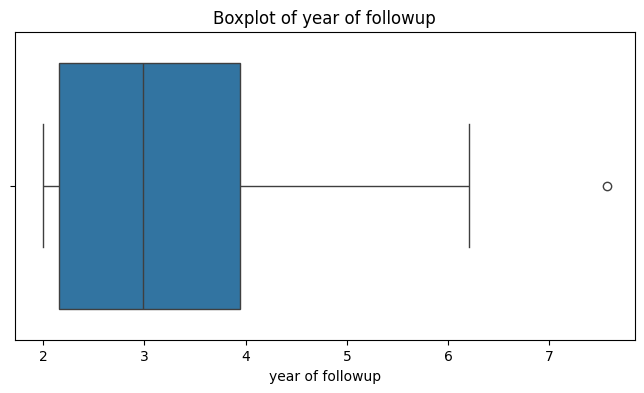

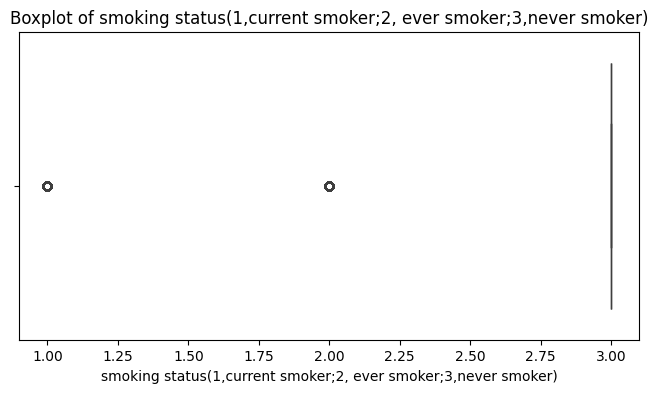

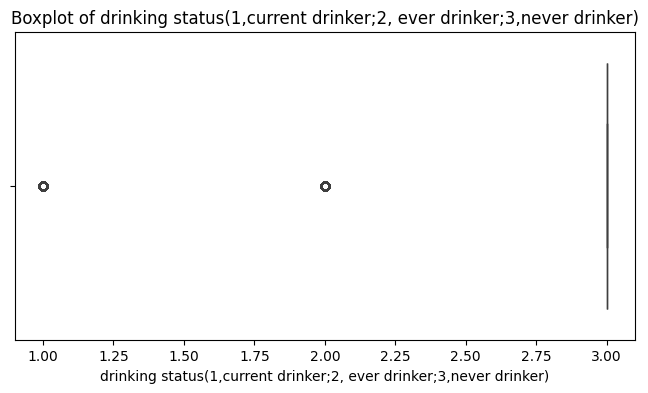

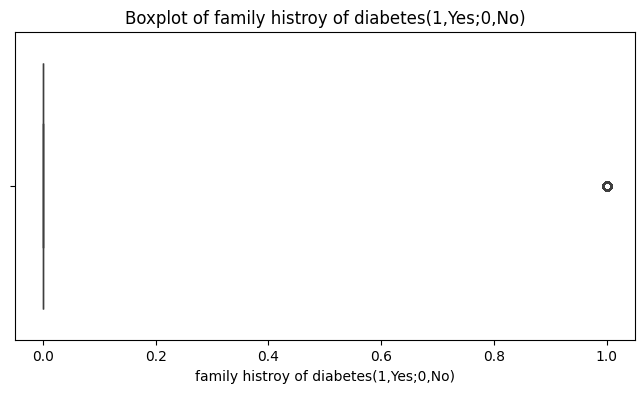

In [14]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
correlation_table = df.corr()

c:\Users\Nidou\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 65288 (\N{FULLWIDTH LEFT PARENTHESIS}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Users\Nidou\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 65289 (\N{FULLWIDTH RIGHT PARENTHESIS}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()


<Axes: >

C:\Users\Nidou\AppData\Roaming\Python\Python313\site-packages\IPython\core\events.py:82: UserWarning: Glyph 65288 (\N{FULLWIDTH LEFT PARENTHESIS}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\Nidou\AppData\Roaming\Python\Python313\site-packages\IPython\core\events.py:82: UserWarning: Glyph 65289 (\N{FULLWIDTH RIGHT PARENTHESIS}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\Nidou\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65288 (\N{FULLWIDTH LEFT PARENTHESIS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Nidou\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65289 (\N{FULLWIDTH RIGHT PARENTHESIS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


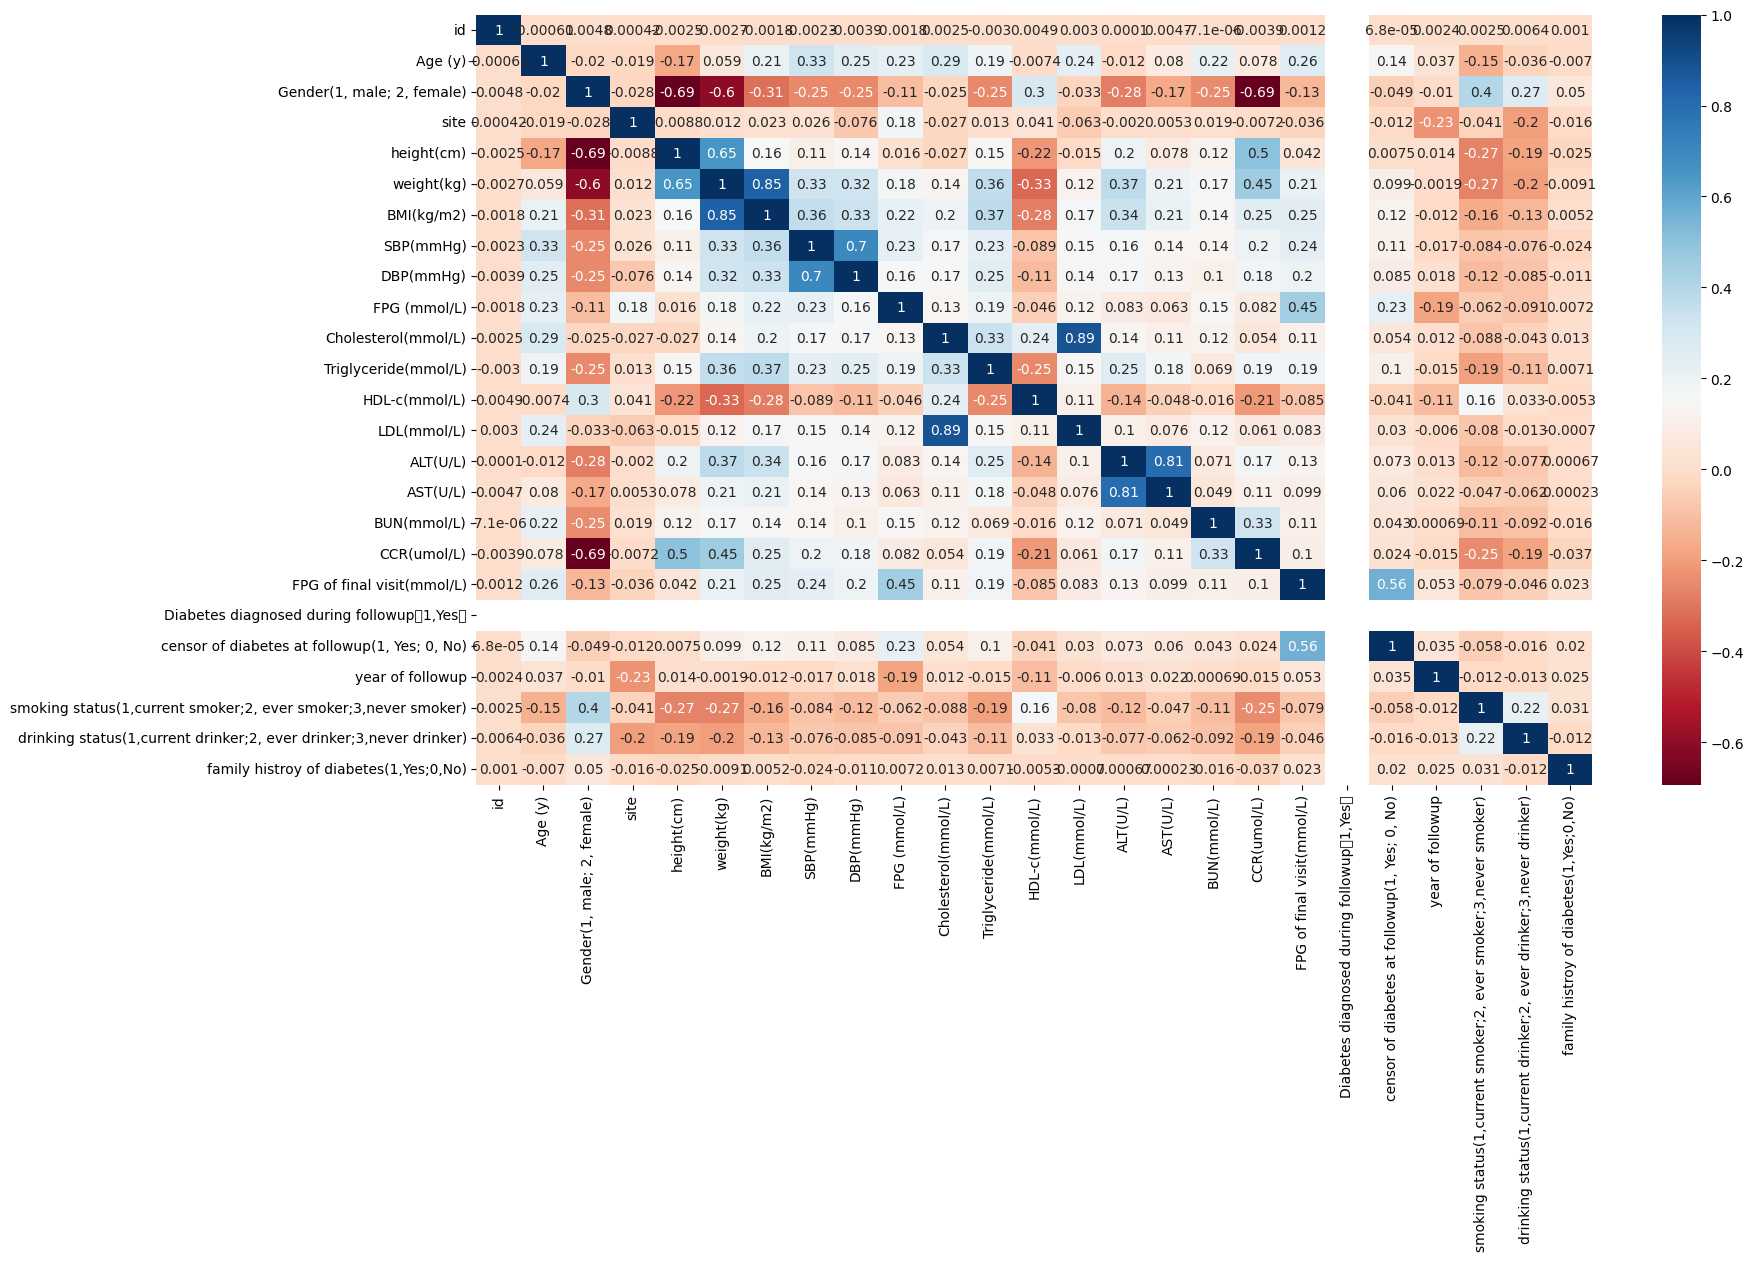

In [13]:
plt.figure(figsize = (18,10))
sns.heatmap(data = correlation_table, annot = True, cmap = 'RdBu')